<a href="https://colab.research.google.com/github/Aanoush-Surana/Machine_Learning/blob/main/Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING UCB

In [23]:
import math

N = 10000 # Represents the total users/rounds
d = 10 # Represents the total ads
ads_selected=[] # Represents a List which contains the total ads selected over rounds
# (By the end will represent the total ads selected in 10000 rounds)
# Meaning: If ad 3 is selected in round 1, then ads_selected[0] = 3.


number_of_selections = [0]*d # List to count the number of times each ad was selected


sum_of_rewards = [0]*d # List to store the sum of rewards (clicks) received from each ad
# Meaning: If ad 2 was shown 5 times and clicked 3 times, sum_of_rewards[2] = 3.


total_rewards = 0 # Total reward accumulated from all ads over all rounds
# Purpose: Keeps track of how many total clicks were received across all rounds.

for n in range (0,N):
  ad = 0
  max_upper_bound = 0

  # ad: Will store the index of the best ad to show in this round.
  # max_upper_bound: Stores the highest UCB value found so far for comparison.

  for i in range (0,d):

    # Purpose: Loop through all 10 ads (from index 0 to 9) to find the one with the highest UCB.

    if (number_of_selections[i] > 0): # If the ad has been selected at least once:

      # Since we only calculate average reward and confidence bounds for ads already shown.

      avg_reward = sum_of_rewards[i] / number_of_selections[i]

      # Purpose: Estimate how well the ad is performing.
      # Meaning: If ad was clicked 3 times out of 10, then avg = 0.3

      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])

      #  Calculate the confidence interval (exploration term)
      #  Purpose: Add an exploration bonus — the less you've tried an ad, the bigger this term is.
      #  Why? Helps explore lesser-used ads instead of always choosing the best-known.

      UB = avg_reward + delta_i

      # Compute the Upper Confidence Bound
      # Purpose: Combine exploitation (avg reward) and exploration (delta).
      # Meaning: Ad with highest UB is considered best candidate.

    else:

      # If ad i has never been shown.
      # Purpose: Force this ad to be selected at least once by giving it a huge UCB value.
      # 1e400: Very large number → ensures that all ads are explored at least once.

      # After all the ads are iterated once this condition will be never satisfied
      UB = 1e400
    if (UB > max_upper_bound):
      # Purpose: Keep track of the ad with the best UCB so far in this round.
      max_upper_bound = UB
      ad = i

  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] + 1 # Increment how many times this ad has been shown.
  reward = dataset.values[n , ad] # Get the reward (click or not) for showing ad ad to user n.
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward # Update total reward received for this particular ad.
  total_rewards = total_rewards + reward # Update total reward received for this particular ad.

VISUALISING RESULTS

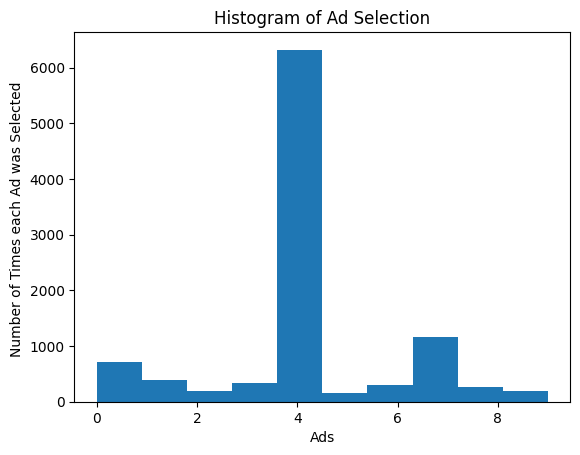

In [26]:
plt.hist(ads_selected)
plt.title('Histogram of Ad Selection')
plt.xlabel('Ads')
plt.ylabel('Number of Times each Ad was Selected ')
plt.show()